# Introduction to Regression with Neural Networks in Tensorflow

In [ ]:
# Import Tensorflow
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.5.0


## Create some data to view and fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create Features

X  = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
X = tf.constant(X)
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [ ]:
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
y = tf.constant(y)
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

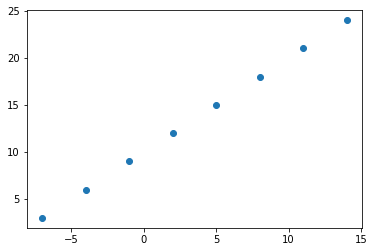

In [ ]:
plt.scatter(X, y);

In [ ]:
y ==  X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

## Input and output shapes

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 576ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Make a prediction using the model
model.predict([17])

array([[12.716021]], dtype=float32)

## Improving the model

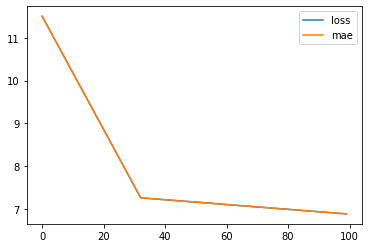

In [ ]:
# Rebuild the model

tf.random.set_seed(42)

# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae']
              )

# Fit the model
model.fit(X, y, epochs=100, verbose=0)

pd.DataFrame(model.history.history).plot();

In [ ]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

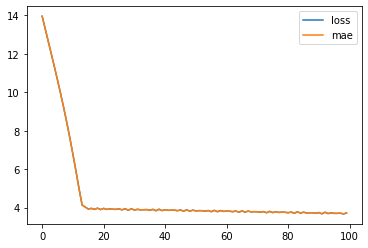

In [ ]:
# Rebuild the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100, verbose=0);

pd.DataFrame(model.history.history).plot()

In [ ]:
# The model seems to be overfitted
model.predict([17])

array([[31.941307]], dtype=float32)

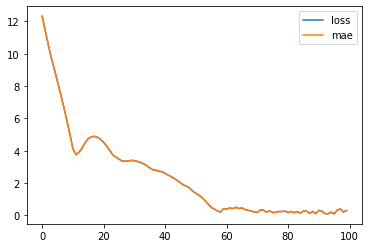

In [ ]:
# Rebuild the model

tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

model.fit(X, y, epochs=100, verbose=0)

pd.DataFrame(model.history.history).plot()


In [ ]:
model.predict([17])

array([[26.206877]], dtype=float32)

## Evaluting the model

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make label for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

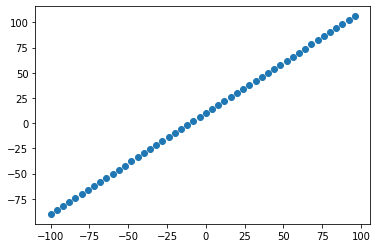

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y);

In [ ]:
# Split the data into train and test
test_size = 0.2

test_split_idx = int((1 - test_size) * len(X))
test_split_idx

40

In [ ]:
X_train, X_test = X[:test_split_idx], X[test_split_idx:]
y_train, y_test = y[:test_split_idx], y[test_split_idx:]

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

((TensorShape([40]), TensorShape([10])),
 (TensorShape([40]), TensorShape([10])))

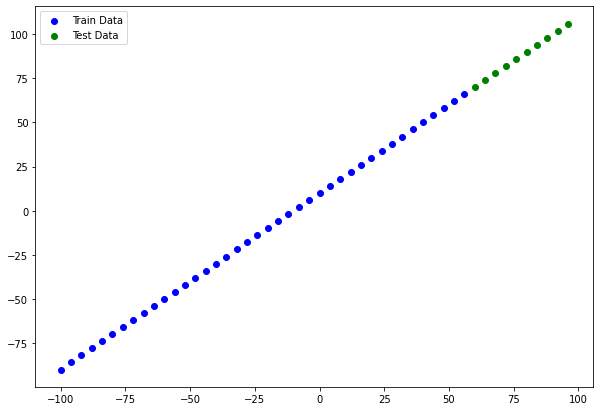

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Train Data')
plt.scatter(X_test, y_test, c='g', label='Test Data');
plt.legend();

In [ ]:
X[0]

<tf.Tensor: shape=(), dtype=int32, numpy=-100>

In [ ]:
# Build a model

model = tf.keras.models.Sequential(name='MyModel')

model.add(tf.keras.layers.Dense(units=10, input_shape=[1], name='Input_Layer'))
model.add(tf.keras.layers.Dense(units=1, name='Output_Layer'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

model.summary()

Model: "MyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=0)

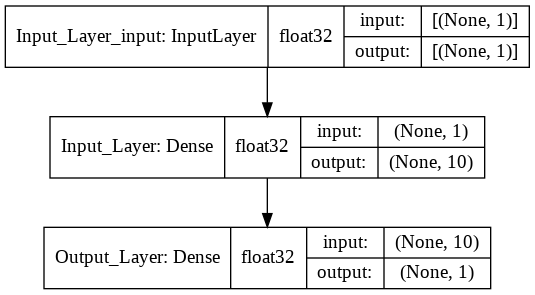

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True)

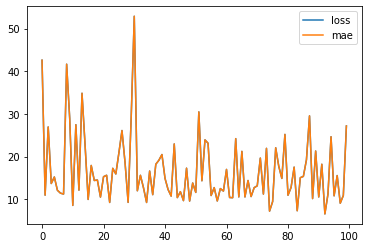

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[ 75.978065],
       [ 80.92622 ],
       [ 85.87439 ],
       [ 90.82255 ],
       [ 95.77071 ],
       [100.718864],
       [105.66703 ],
       [110.61519 ],
       [115.563354],
       [120.51152 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Create a plottig function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label='Train Data')
  plt.scatter(test_data, test_labels, c='g', label='Test Data')
  plt.scatter(test_data, predictions, c='orange', label='Predictions')
  plt.legend()

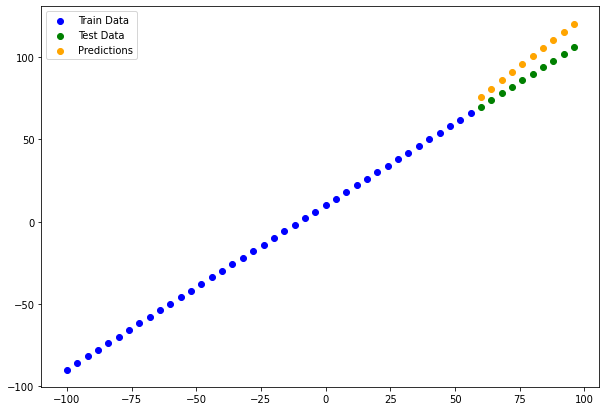

In [ ]:
plot_predictions()

### Evaluating the model with regression evalution metrics

In [ ]:
# Evaluate the model with X_test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 136ms/step - loss: 10.2448 - mae: 10.2448


[10.244787216186523, 10.244787216186523]

In [ ]:
# Calculate the mae
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=10.24479>

In [ ]:
# Calculate the mse
tf.metrics.mean_squared_error(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=112.37256>

### `model_1`: one Dense layer traind for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.models.Sequential(name='model_1')

# Add Layers to the model
model_1.add(tf.keras.layers.Dense(units=1, input_shape=[1], name='laye_1'))

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

# Print model Summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
laye_1 (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.fit(X_train, y_train, epochs=100, verbose=0)

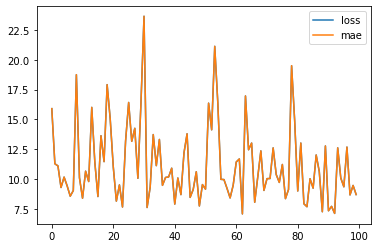

In [ ]:
pd.DataFrame(model_1.history.history).plot();

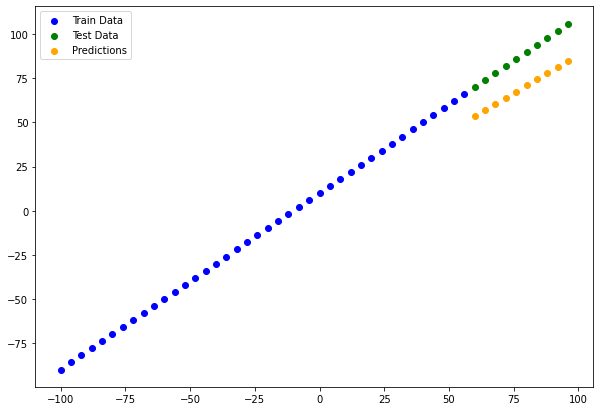

In [ ]:
# Make and plot preditions for model_1
y_pred_1 = model_1.predict(X_test)

plot_predictions(predictions=y_pred_1)

In [ ]:
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### `model_2`: two dense layers trained for 100 epochs

In [ ]:
# Build the model
model_2 = tf.keras.models.Sequential(name='model_2')

# Add Layers
model_2.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model_2.add(tf.keras.layers.Dense(units=1))

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])

# Print the model summary
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


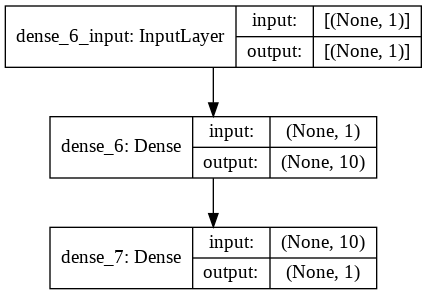

In [ ]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

In [ ]:
model_2.fit(X_train, y_train, epochs=200, verbose=0)

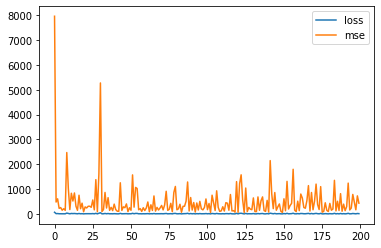

In [ ]:
pd.DataFrame(model_2.history.history).plot()

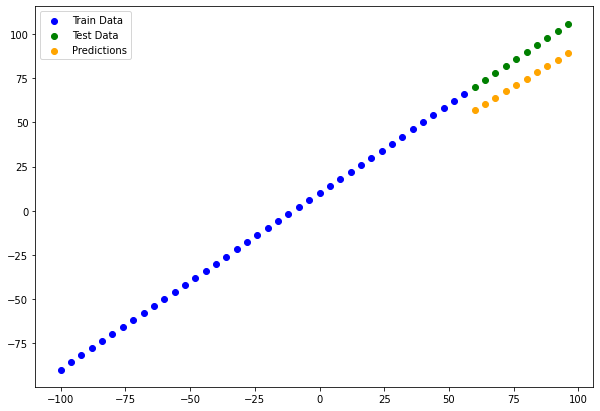

In [ ]:
# Make and model predictions with model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=15.048238>,
 <tf.Tensor: shape=(), dtype=float32, numpy=227.8374>)

### `model_2`: 2 layers trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.models.Sequential(name='model_3')

# Add layers
model_3.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model_3.add(tf.keras.layers.Dense(units=1))

# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=['mse'])

# Print model summary
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


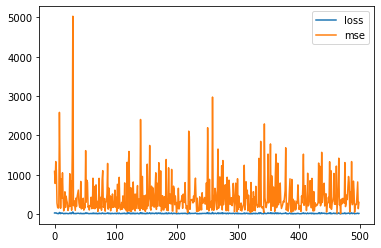

In [ ]:
model_3.fit(X_train, y_train, epochs=500, verbose=0)
pd.DataFrame(model_3.history.history).plot()


In [ ]:
y_pred_3 = model_3.predict(X_test)

In [ ]:
mae_3 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_3))
mse_3 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

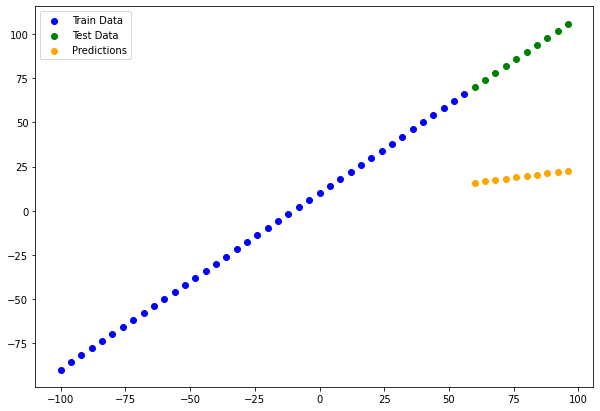

In [ ]:
plot_predictions(predictions=y_pred_3)

### Saving our model

In [ ]:
model_2.save('model_2_SavedModel')

INFO:tensorflow:Assets written to: model_2_SavedModel/assets


In [ ]:
# Save model using the HDF5 format
model_2.save('model_2_HDF5_format.h5')

In [ ]:
# Load in the SavedModel format model
loaded_saved_model_formt = tf.keras.models.load_model('/content/model_2_SavedModel')
loaded_saved_model_formt.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
